# Import

In [379]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Load data

In [129]:
ratings_df = pd.read_csv('data/ratings.csv')
books_df = pd.read_csv('data/books.csv')
tags_df = pd.read_csv('data/tags.csv')
book_tags = pd.read_csv('data/book_tags.csv')

# Data Analysis

## Ratings

In [3]:
ratings_df.shape

(5976479, 3)

In [4]:
for col in ratings_df.columns:
    print(col,ratings_df[col].nunique())

user_id 53424
book_id 10000
rating 5


In [5]:
ratings_df.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [6]:
ratings_df.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [7]:
# ratings per user
ratings_df.shape[0]/ratings_df['user_id'].nunique()

111.86880428271938

## Hist

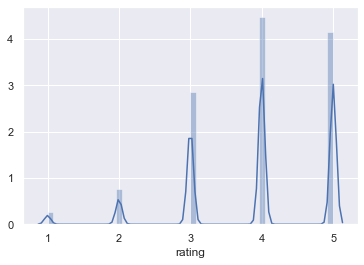

In [8]:
ax = sns.distplot(ratings_df['rating'])

## Books

In [97]:
books_df.shape

(10000, 23)

## Tags

### Manual tag filtering

In [223]:
tag_counts = pd.merge(book_tags, tags_df, on='tag_id').groupby('tag_name')['count'].sum().sort_values(ascending=False)
top_tags = tag_counts[tag_counts>20000][3:]

In [126]:
tag_map = {'ya':'young-adult', 'nonfiction':'non-fiction', 'classic':'classics', 'graphic-novels':'novels'\
          ,'dystopia':'dystopian', 'childrens':'children', 'children-s':'children', 'children-s-books':'children'\
          ,'graphic-novel':'novels', 'novel':'novels', 'vampire':'vampires', 'childrens-books':'children'\
          ,'funny':'humor','humour':'humor', 'memoirs':'memoir', 'kids-books':'kids', 'england':'british'\
          ,'ya-fiction':'young-adult-fiction', 'comedy':'humor', 'sf':'sci-fi', 'christian':'religion'\
          ,'ya-books':'young-adult', 'children-s-literature':'children', 'thrillers':'thriller'\
          ,'detective':'mystery', 'favorite-series':'series', 'children-s-lit':'children'\
          ,'science-fiction':'sci-fi','science-fiction-fantasy':'sci-fi-fantasy','fantasy-sci-fi':'sci-fi-fantasy'\
          ,'scifi-fantasy':'sci-fi-fantasy','american-literature':'american','childhood-favorites':'childhood'\
          ,'childhood-books':'childhood','biography-memoir':'biography','cómics':'comics','for-school':'school'\
          ,'biographies':'biography','ya-lit':'young-adult','picture-books':'picture-book'\
          ,'comics-graphic-novels':'comics','spirituality':'religion','clàssics':'classics'\
          ,'part-of-a-series':'series','british-literature':'british','college':'school','middle-school':'school'\
          ,'fantasy-scifi':'sci-fi-fantasy','juvenile-fiction':'teen-fiction','love-triangle':'romance'\
          ,'spiritual':'religion','scifi':'sci-fi','comic':'comics','shapeshifters':'shifters','comic-books':'comics'\
          ,'mangá':'manga','chicklit':'chick-lit','graphic-novels-comics':'novels', 'graphic-novels':'novels'\
          ,'mystery-crime':'mystery','mysteries':'mystery','mystery-thriller':'mystery','mystery-suspense':'mystery'\
          ,'crime-mystery':'mystery','classic-fiction':'fiction','general-fiction':'fiction','lgbtq':'lgbt'}
tags = ['fiction','fantasy','young-adult','classics','romance','mystery','non-fiction','historical-fiction','series','sci-fi','paranormal','contemporary','horror','urban-fantasy','adult','children','thriller','vampires','adventure','history','dystopian','historical','humor','novels','chick-lit','literature','paranormal-romance','magic','crime','comics','memoir','adult-fiction','sci-fi-fantasy','biography','supernatural','manga','philosophy','teen','science','new-adult','suspense','poetry','school','contemporary-romance','childhood','plays','realistic-fiction','kids','short-stories','drama','abandoned','middle-grade','english','contemporary-fiction','literary-fiction','psychology','young-adult-fiction','historical-romance','mythology','american','ya-fantasy','business','british','action','war','high-fantasy','religion','epic-fantasy','coming-of-age','high-school','erotica','family','angels','self-help','politics','classic-literature','post-apocalyptic','werewolves','love','travel','juvenile','discworld','animals','steampunk','time-travel','friendship','magical-realism','lgbt','literary','autobiography','dragons','witches','feminism','zombies','alpha-male','fairy-tales','speculative-fiction','picture-book','demons','food','gothic','art','christian-fiction','action-adventure','dark','youth','essays','music','crime-fiction'   ,'teen-fiction','made-me-cry','ghosts','women','shifters','sports','arc','epic','cookbooks','economics','africa','romantic-suspense','survival','book-boyfriends','military','french']


In [132]:
# select main tags
main_tags = tags_df.copy()
main_tags['tag_name'] = main_tags['tag_name'].map(tag_map)
main_tags = main_tags[main_tags['tag_name'].notna()]

# filter books with main tags
filtered_book_tags = book_tags[book_tags['tag_id'].isin(main_tags.index)]
joined_book_tags = pd.merge(filtered_book_tags, main_tags, on='tag_id')

In [134]:
# aggregate to remove duplicate tags
grouped_book_tags = joined_book_tags.groupby(['goodreads_book_id','tag_name'])['count'].sum().reset_index()

In [190]:
pivoted_book_table = grouped_book_tags.pivot('goodreads_book_id','tag_name','count')
book_tag_table_pc = (pivoted_book_table.T/pivoted_book_table.sum(axis=1)).T.fillna(0)

In [191]:
book_tag_table = (pivoted_book_table>0).astype(int)

In [192]:
book_tag_table_pc

tag_name,american,biography,british,chick-lit,childhood,children,classics,comics,dystopian,fiction,humor,kids,lgbt,manga,memoir,mystery,non-fiction,novels,picture-book,religion,romance,school,sci-fi,sci-fi-fantasy,series,shifters,teen-fiction,thriller,vampires,young-adult,young-adult-fiction
goodreads_book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.020750,0.0,0.041871,0.393426,0.000000,0.0,0.0,0.0,0.0,0.022088,0.0,0.0,0.000000,0.0,0.000000,0.030492,0.0,0.000000,0.0,0.000000,0.0,0.104938,0.027369,0.0,0.000000,0.0,0.0,0.324557,0.034508
2,0.0,0.000000,0.061930,0.0,0.074341,0.266717,0.030648,0.0,0.0,0.0,0.0,0.040020,0.0,0.0,0.000000,0.0,0.000000,0.054205,0.0,0.000000,0.0,0.023936,0.0,0.211246,0.045466,0.0,0.026216,0.0,0.0,0.106510,0.058764
3,0.0,0.000000,0.018446,0.0,0.047117,0.434231,0.023122,0.0,0.0,0.0,0.0,0.025588,0.0,0.0,0.000000,0.0,0.000000,0.029596,0.0,0.000000,0.0,0.000000,0.0,0.090844,0.031395,0.0,0.000000,0.0,0.0,0.271092,0.028568
5,0.0,0.000000,0.020346,0.0,0.047005,0.434797,0.000000,0.0,0.0,0.0,0.0,0.023368,0.0,0.0,0.000000,0.0,0.000000,0.030016,0.0,0.000000,0.0,0.000000,0.0,0.099584,0.026121,0.0,0.000000,0.0,0.0,0.288611,0.030150
6,0.0,0.000000,0.019905,0.0,0.043546,0.396467,0.017459,0.0,0.0,0.0,0.0,0.022147,0.0,0.0,0.000000,0.0,0.000000,0.030095,0.0,0.000000,0.0,0.000000,0.0,0.115761,0.026019,0.0,0.000000,0.0,0.0,0.297758,0.030842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31538647,0.0,0.000000,0.051136,0.0,0.000000,0.392045,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.119318,0.039773,0.0,0.000000,0.0,0.0,0.397727,0.000000
31845516,0.0,0.138075,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.311715,0.0,0.414226,0.000000,0.0,0.135983,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
32075671,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.896226,0.103774


### Auto tag filtering

In [488]:
def drop_correlated_features(df, threshold=0.95):
    # calculate correlation matrix between columns
    corr_matrix = df.corr()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # drop correlated columns
    filtered_df = df.drop(df[to_drop], axis=1)

    return filtered_df

def calculate_correlation_matrix():
    # Load data
    # ratings_df = load_data('data/ratings.csv')
    books_df = load_data('data/books.csv')
    tags_df = load_data('data/tags.csv')
    book_tags = load_data('data/book_tags.csv')
    
    # selected_tags = None 
    # 99% corr 
    selected_tags = [  236,   240,   248,   251,   254,   261,   272,   509,   617,
              671,   698,   711,   747,   751,   753,   780,   783,   785,
              805,   831,   833,   895,   923,   941,  1010,  1078,  1128,
             1416,  1499,  1540,  1542,  1642,  1659,  1691,  2056,  2271,
             2305,  2538,  2852,  3371,  3379,  3389,  3392,  4615,  5090,
             5207,  5481,  7725,  8055,  8517,  8717,  9221, 10093, 10197,
            10210, 11557, 11590, 11743, 15048, 25149, 25152, 30574, 32586]
#     # 95% corr
#     selected_tags = [  236,   248,   254,   261,   272,   509,   698,   711,   747,
#               751,   753,   783,   785,  1416,  1499,  1642,  1659,  1691,
#              2056,  2305,  2538,  5207,  8717, 11557, 30574]

    # select only tags used more than 5k times
    tag_counts = pd.merge(book_tags, tags_df, on='tag_id').groupby('tag_id')['count'].sum()\
        .sort_values(ascending=False)
    top_tags = tag_counts[tag_counts>5000]

    # apply filter
    filtered_book_tags = book_tags[book_tags['tag_id'].isin(top_tags.index)]

    # aggregate to remove duplicate tags
    grouped_book_tags = filtered_book_tags.groupby(['goodreads_book_id','tag_id'])['count'].sum().reset_index()

    # pivot tables (books x tags)
    pivoted_book_table = grouped_book_tags.pivot('goodreads_book_id','tag_id','count')

    filtered_pivoted_book_table = pivoted_book_table[selected_tags]
    # filtered_pivoted_book_table = drop_correlated_features(pivoted_book_table)

    # change table from count to binary (1 or 0)
    book_tag_table = (filtered_pivoted_book_table>0).astype(int)

    # calculate correlation matrix between books
    correlation_matrix = pd.DataFrame(np.corrcoef(book_tag_table), index=book_tag_table.index\
                                      , columns=book_tag_table.index)

    return correlation_matrix#, filtered_pivoted_book_table.columns

def save_correlation_matrix(correlation_matrix):
    correlation_matrix.to_csv('data/correlation_matrix.csv')
    return True

In [489]:
%%time
correlation_matrix = calculate_correlation_matrix()

CPU times: user 2.2 s, sys: 459 ms, total: 2.66 s
Wall time: 2.55 s


In [496]:
def get_top_books(x):
    return x.sort_values(ascending=False).index

top_books = correlation_matrix.apply(get_top_books).head(20)

In [502]:
top_books.to_csv('data/top_books.csv', index=False)

In [495]:
correlation_matrix.head()

goodreads_book_id,1,2,3,5,6,8,10,11,13,21,24,25,26,27,28,29,30,33,34,36,50,67,93,98,105,106,112,117,119,122,231,249,250,264,275,291,295,304,320,343,348,350,353,355,357,359,360,365,378,386,400,415,424,428,431,432,446,447,449,456,475,597,599,621,629,647,656,662,665,667,668,676,698,703,706,760,771,816,822,823,825,827,830,840,865,870,880,890,900,902,903,930,952,960,968,976,998,1005,1032,1052,1067,1078,1097,1103,1110,1171,1191,1192,1202,1232,1241,1274,1295,1301,1303,1305,1307,1319,1362,1371,1375,1381,1420,1426,1427,1428,1430,1431,1519,1524,1540,1554,1591,1617,1618,1622,1624,1625,1627,1633,1635,1715,1823,1824,1842,1845,1846,1848,1849,1852,1869,1875,1885,1897,1898,1911,1934,1953,1990,2002,2049,2050,2052,2054,2067,2068,2094,2095,2122,2137,2142,2152,2156,2159,2165,2175,2183,2187,2199,2203,2255,2265,2279,2368,2371,2372,2373,2430,2442,2493,2517,2526,2528,2530,2547,2612,2615,2623,2657,2666,2677,2696,2715,2743,2744,2748,2767,2784,2794,2839,2865,2872,2873,2879,2880,2915,2932,2956,2978,2998,3008,3028,3049,3061,3087,3102,3103,3109,3110,3273,3291,3300,3304,3368,3378,3379,3381,3384,3388,3412,3431,3446,3447,3462,3463,3464,3465,3466,3467,3473,...,24903919,24911006,24920901,24934065,24937499,24940998,24950845,24961498,24961531,25005214,25010281,25041504,25056528,25065522,25065629,25066591,25066991,25067046,25074850,25104491,25106926,25111004,25114548,25131600,25142924,25152052,25153134,25205422,25222064,25228579,25241477,25242224,25251757,25279165,25293695,25316313,25332115,25337081,25372801,25387202,25387351,25422234,25430584,25451555,25451852,25454883,25489012,25489025,25489625,25494343,25507925,25526965,25527908,25558608,25564446,25564665,25573977,25574782,25613617,25614492,25614598,25614984,25624089,25644437,25644601,25663717,25663888,25664459,25666046,25671827,25671861,25689074,25690958,25693079,25711641,25733983,25733990,25734248,25735012,25772000,25773504,25776122,25776210,25781157,25801299,25802884,25809756,25813921,25813937,25814512,25816688,25817162,25817493,25817528,25817531,25828204,25837338,25837341,25852784,25852870,25855506,25866725,25877663,25883848,25893582,25893693,25893709,25899336,25912358,25937671,25953369,26025580,26025989,26061591,26072609,26074181,26109394,26114135,26114516,26116430,26131641,26154406,26158341,26192467,26192646,26200563,26214866,26224667,26228034,26236956,26245850,26245853,26247008,26252659,26252859,26583370,26721568,26722820,26771521,26827675,26891429,26893819,27070127,27071490,27083865,27152124,27161156,27161845,27170141,27207654,27209407,27209486,27213121,27213163,27220736,27239265,27252717,27276262,27362503,27401883,27406436,27406704,27419654,27423283,27810589,27821486,27824826,27833670,27864391,27868677,27883214,27904311,28016509,28077464,28187230,28204534,28214365,28220985,28233082,28240855,28251002,28257707,28260587,28262024,28374062,28390369,28449257,28449270,28477789,28587957,28678119,28686830,28686840,28698036,28763485,28802599,28815371,28815474,28862528,28959148,28965131,29008738,29056083,29072594,29103028,29104680,29154543,29236299,29340182,29354916,29367958,29405093,29430007,29430012,29430013,29430788,29437949,29519514,29519517,29610595,29632984,29639736,29780253,29868610,29906980,29925715,29975458,29981261,29991719,30002998,30008702,30065028,30226723,30253700,30253864,30314465,30364931,30555488,30831912,30839185,31140847,31176886,31194270,31538614,31538635,31538647,31845516,32075671,32848471,33288638
goodreads_book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.565269,0.959766,0.922531,0.786871,0.652983,0.783818,0.592796,0.495728,0.5

In [504]:
top_books = pd.read_csv('data/top_books.csv')

In [511]:
list(top_books['1'].iloc[:n])

[1,
 3,
 136251,
 15881,
 5,
 100915,
 537070,
 45109,
 6609765,
 18116,
 58893,
 84369,
 24408,
 53496,
 3090465,
 41865,
 3685,
 795034,
 902,
 2839]

In [518]:
# Function to be called outside
def find_k_similar_books(goodreads_book_id, n=20):
    similar_books = list(top_books[str(goodreads_book_id)].iloc[:n])
    filtered_books_df = books_df[books_df['goodreads_book_id'].isin(similar_books)].copy()

    return filtered_books_df.to_dict(orient='records')

In [519]:
find_k_similar_books(1,20)

[{'book_id': 2,
  'goodreads_book_id': 3,
  'best_book_id': 3,
  'work_id': 4640799,
  'books_count': 491,
  'isbn': '439554934',
  'isbn13': 9780439554930.0,
  'authors': 'J.K. Rowling, Mary GrandPré',
  'original_publication_year': 1997.0,
  'original_title': "Harry Potter and the Philosopher's Stone",
  'title': "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  'language_code': 'eng',
  'average_rating': 4.44,
  'ratings_count': 4602479,
  'work_ratings_count': 4800065,
  'work_text_reviews_count': 75867,
  'ratings_1': 75504,
  'ratings_2': 101676,
  'ratings_3': 455024,
  'ratings_4': 1156318,
  'ratings_5': 3011543,
  'image_url': 'https://images.gr-assets.com/books/1474154022m/3.jpg',
  'small_image_url': 'https://images.gr-assets.com/books/1474154022s/3.jpg'},
 {'book_id': 3,
  'goodreads_book_id': 41865,
  'best_book_id': 41865,
  'work_id': 3212258,
  'books_count': 226,
  'isbn': '316015849',
  'isbn13': 9780316015840.0,
  'authors': 'Stephenie Meyer',
  'origina

In [408]:
%%time
correlation_matrix, selected_tags = calculate_correlation_matrix()

CPU times: user 16.3 s, sys: 612 ms, total: 16.9 s
Wall time: 17.1 s


In [330]:
correlation_matrix = load_data('data/correlation_matrix.csv')
correlation_matrix.set_index('goodreads_book_id', inplace=True)

In [372]:
correlation_matrix.head()

,1,2,3,5,6,8,10,11,13,21,24,25,26,27,28,29,30,33,34,36,50,67,93,98,105,106,112,117,119,122,231,249,250,264,275,291,295,304,320,343,348,350,353,355,357,359,360,365,378,386,400,415,424,428,431,432,446,447,449,456,475,597,599,621,629,647,656,662,665,667,668,676,698,703,706,760,771,816,822,823,825,827,830,840,865,870,880,890,900,902,903,930,952,960,968,976,998,1005,1032,1052,1067,1078,1097,1103,1110,1171,1191,1192,1202,1232,1241,1274,1295,1301,1303,1305,1307,1319,1362,1371,1375,1381,1420,1426,1427,1428,1430,1431,1519,1524,1540,1554,1591,1617,1618,1622,1624,1625,1627,1633,1635,1715,1823,1824,1842,1845,1846,1848,1849,1852,1869,1875,1885,1897,1898,1911,1934,1953,1990,2002,2049,2050,2052,2054,2067,2068,2094,2095,2122,2137,2142,2152,2156,2159,2165,2175,2183,2187,2199,2203,2255,2265,2279,2368,2371,2372,2373,2430,2442,2493,2517,2526,2528,2530,2547,2612,2615,2623,2657,2666,2677,2696,2715,2743,2744,2748,2767,2784,2794,2839,2865,2872,2873,2879,2880,2915,2932,2956,2978,2998,3008,3028,3049,3061,3087,3102,3103,3109,3110,3273,3291,3300,3304,3368,3378,3379,3381,3384,3388,3412,3431,3446,3447,3462,3463,3464,3465,3466,3467,3473,...,24903919,24911006,24920901,24934065,24937499,24940998,24950845,24961498,24961531,25005214,25010281,25041504,25056528,25065522,25065629,25066591,25066991,25067046,25074850,25104491,25106926,25111004,25114548,25131600,25142924,25152052,25153134,25205422,25222064,25228579,25241477,25242224,25251757,25279165,25293695,25316313,25332115,25337081,25372801,25387202,25387351,25422234,25430584,25451555,25451852,25454883,25489012,25489025,25489625,25494343,25507925,25526965,25527908,25558608,25564446,25564665,25573977,25574782,25613617,25614492,25614598,25614984,25624089,25644437,25644601,25663717,25663888,25664459,25666046,25671827,25671861,25689074,25690958,25693079,25711641,25733983,25733990,25734248,25735012,25772000,25773504,25776122,25776210,25781157,25801299,25802884,25809756,25813921,25813937,25814512,25816688,25817162,25817493,25817528,25817531,25828204,25837338,25837341,25852784,25852870,25855506,25866725,25877663,25883848,25893582,25893693,25893709,25899336,25912358,25937671,25953369,26025580,26025989,26061591,26072609,26074181,26109394,26114135,26114516,26116430,26131641,26154406,26158341,26192467,26192646,26200563,26214866,26224667,26228034,26236956,26245850,26245853,26247008,26252659,26252859,26583370,26721568,26722820,26771521,26827675,26891429,26893819,27070127,27071490,27083865,27152124,27161156,27161845,27170141,27207654,27209407,27209486,27213121,27213163,27220736,27239265,27252717,27276262,27362503,27401883,27406436,27406704,27419654,27423283,27810589,27821486,27824826,27833670,27864391,27868677,27883214,27904311,28016509,28077464,28187230,28204534,28214365,28220985,28233082,28240855,28251002,28257707,28260587,28262024,28374062,28390369,28449257,28449270,28477789,28587957,28678119,28686830,28686840,28698036,28763485,28802599,28815371,28815474,28862528,28959148,28965131,29008738,29056083,29072594,29103028,29104680,29154543,29236299,29340182,29354916,29367958,29405093,29430007,29430012,29430013,29430788,29437949,29519514,29519517,29610595,29632984,29639736,29780253,29868610,29906980,29925715,29975458,29981261,29991719,30002998,30008702,30065028,30226723,30253700,30253864,30314465,30364931,30555488,30831912,30839185,31140847,31176886,31194270,31538614,31538635,31538647,31845516,32075671,32848471,33288638
goodreads_book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.565269,0.959766,0.922531,0.786871,0.652983,0.783818,0.592796,0.495728,0.570068,0.593584,0.

### Find similar books by tag

In [ ]:
books_df = load_data('data/books.csv')

In [377]:
# book lookup
search_string = 'Harry Potter'
cond = books_df['title'].str.lower().str.contains(search_string.lower().replace('+',' '))
books_df[cond]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
17,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban (Harr...,eng,4.53,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
20,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix (Har...,eng,4.46,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
22,23,15881,15881,6231171,398,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,Harry Potter and the Chamber of Secrets (Harry...,eng,4.37,1779331,1906199,34172,8253,42251,242345,548266,1065084,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...
23,24,6,6,3046572,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire (Harry Pot...,eng,4.53,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
24,25,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...
26,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
278,279,29056083,29056083,48765776,95,751565350,9.780752e+12,"John Tiffany, Jack Thorne, J.K. Rowling",2016.0,"Harry Potter and the Cursed Child, Parts One a...",Harry Potter and the Cursed Child - Parts One ...,eng,3.75,270603,397773,53365,15828,35842,96395,133156,116552,https://images.gr-assets.com/books/1470082995m...,https://images.gr-assets.com/books/1470082995s...
421,422,862041,862041,2962492,76,545044251,9.780545e+12,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,"Harry Potter Boxset (Harry Potter, #1-7)",eng,4.74,190050,204125,6508,1105,1285,7020,30666,164049,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...
2000,2001,7952502,7952502,11580916,24,61997811,9.780062e+12,Brian Sibley,2010.0,Harry Potter: Film Wizardry,Harry Potter: Film Wizardry,eng,4.48,45081,46063,526,1058,984,4017,8553,31451,https://images.gr-assets.com/books/1464452934m...,https://images.gr-assets.com/books/1464452934s...


In [378]:
books_df.sort_values('average_rating',ascending=False).iloc[:n]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,eng,4.82,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
3274,3275,8,8,21457576,11,439682584,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,862,17332218,17332218,16482835,34,765326361,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
8853,8854,95602,95602,920037,6,842339523,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,Mark of the Lion Trilogy,en-US,4.76,9081,9547,731,27,61,323,1363,7773,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
7946,7947,5031805,5031805,40769318,96,1433502410,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,ESV Study Bible,eng,4.76,8953,10784,262,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...
4482,4483,24814,24814,25601,21,836221362,9.780836e+12,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,It's a Magical World: A Calvin and Hobbes Coll...,eng,4.75,22351,23429,264,36,57,850,3737,18749,https://images.gr-assets.com/books/1437420710m...,https://images.gr-assets.com/books/1437420710s...
6360,6361,70489,70489,170846,22,836213122,9.780836e+12,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,There's Treasure Everywhere: A Calvin and Hobb...,eng,4.74,16766,17285,149,22,69,680,2822,13692,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
421,422,862041,862041,2962492,76,545044251,9.780545e+12,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,"Harry Potter Boxset (Harry Potter, #1-7)",eng,4.74,190050,204125,6508,1105,1285,7020,30666,164049,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...
3752,3753,10,10,21457570,6,439827604,9.780440e+12,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Collection (Harry Potter, #1-6)",eng,4.73,24618,26274,882,203,186,946,3891,21048,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...
6919,6920,24815,24815,25602,19,751500283,9.780752e+12,Bill Watterson,1992.0,The Indispensable Calvin and Hobbes: A Calvin ...,The Indispensable Calvin and Hobbes,eng,4.73,14597,16911,325,19,62,666,2969,13195,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [373]:
# def load_data(file_path):
#     assert isinstance(file_path, str), 'Argument {} is not a string'
#     assert path.exists(file_path), '{} does not exist'.format(path)

#     df = pd.read_csv(file_path)

#     return df

# correlation_matrix = load_data('data/correlation_matrix.csv')
# books_df = load_data('data/books.csv')

# Function to be called outside
def find_k_similar_books(goodreads_book_id, n=3):
    similar_books = correlation_matrix[str(goodreads_book_id)].sort_values(ascending=False).head(n)
    similar_books.name = 'correlation'

    similar_books_merged = pd.merge(similar_books,books_df,left_index=True,right_on='goodreads_book_id')
    
    return similar_books_merged.to_dict(orient='records')

books = find_k_similar_books(goodreads_book_id=6690, n=20)
books

[{'correlation': 1.0,
  'book_id': 2741,
  'goodreads_book_id': 6690,
  'best_book_id': 6690,
  'work_id': 824600,
  'books_count': 125,
  'isbn': '375814256',
  'isbn13': 9780375814260.0,
  'authors': 'Roald Dahl, Quentin Blake',
  'original_publication_year': 1975.0,
  'original_title': 'Danny: The Champion of the World',
  'title': 'Danny the Champion of the World',
  'language_code': nan,
  'average_rating': 4.07,
  'ratings_count': 39802,
  'work_ratings_count': 45049,
  'work_text_reviews_count': 1844,
  'ratings_1': 496,
  'ratings_2': 1933,
  'ratings_3': 9393,
  'ratings_4': 15259,
  'ratings_5': 17968,
  'image_url': 'https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png',
  'small_image_url': 'https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png'},
 {'correlation': 0.8838834764831849,
  'book_id': 1545,
  'goodreads_book_id': 776407,
  'best_book_id': 776407,
  'work_id': 3244521,
  'books_count': 146,
  'i

# Book recommendation

## Simple Correlation

### Filter users and books

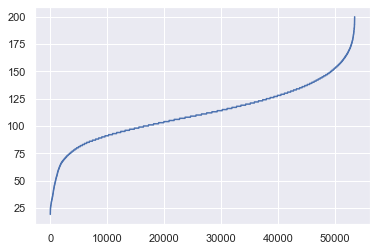

In [34]:
ratings_df.groupby('user_id')['rating'].count().sort_values().reset_index(drop=True).plot()

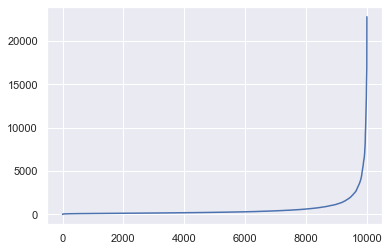

In [43]:
ratings_df.groupby('book_id')['rating'].count().sort_values().reset_index(drop=True).plot()

In [57]:
book_ratings_count = ratings_df.groupby('book_id')['rating'].count()
book_ids = book_ratings_count[book_ratings_count > 200].index

user_ratings_count = ratings_df.groupby('user_id')['rating'].count()
user_ids = user_ratings_count[user_ratings_count > 100].index

cond1 = ratings_df['book_id'].isin(list(book_ids))
cond2 = ratings_df['user_id'].isin(list(user_ids))
filtered_ratings_df = ratings_df[cond1&cond2]

In [42]:
# english books with isbn
cond1 = books_df['isbn'].notna()
cond2 = books_df['language_code'].isin(['eng','en-US','en-CA','en-GB','en'])
filtered_books_df = books_df[cond1 & cond2]

### Calculate correlation

In [59]:
pivoted_rating_df = filtered_ratings_df.pivot('user_id','book_id','rating')

In [60]:
pivoted_rating_df.head()

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,6990,6994,6998,6999,7005,7006,7007,7011,7012,7014,7015,7020,7021,7041,7042,7044,7047,7052,7053,7055,7066,7074,7079,7080,7081,7082,7086,7088,7092,7093,7100,7103,7105,7106,7112,7113,7118,7119,7122,7123,7132,7133,7138,7149,7150,7158,7160,7162,7163,7170,7178,7203,7204,7208,7210,7211,7212,7213,7214,7223,7226,7228,7231,7234,7238,7241,7243,7244,7250,7253,7254,7260,7266,7267,7268,7274,7280,7282,7285,7289,7290,7295,7296,7298,7308,7309,7316,7321,7323,7328,7330,7335,7343,7344,7345,7348,7349,7350,7353,7354,7367,7370,7382,7383,7396,7408,7409,7414,7416,7426,7429,7434,7441,7454,7458,7463,7466,7471,7479,7481,7486,7490,7496,7504,7505,7506,7512,7513,7519,7549,7558,7563,7573,7574,7576,7586,7598,7600,7611,7619,7620,7631,7633,7634,7635,7641,7644,7646,7655,7660,7664,7679,7681,7696,7704,7710,7714,7716,7717,7728,7733,7737,7742,7759,7780,7797,7820,7822,7829,7836,7858,7880,7887,7895,7899,7906,7911,7927,7938,7940,7951,7968,7976,7981,7996,7997,8008,8038,8058,8074,8085,8093,8099,8110,8111,8128,8142,8143,8225,8256,8269,8289,8301,8319,8332,8348,8360,8366,8371,8373,8401,8413,8428,8431,8439,8444,8448,8457,8484,8539,8542,8558,8578,8594,8608,8609,8615,8620,8625,8626,8630,8654,8665,8694,8746,8771,8817,8829,8833,8906,9147,9230,9234,9253,9360,9557,9761,9892,9923,9995
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,5.0,4.0,NaN,2.0,NaN,2.0,NaN,3.0,4.0,NaN,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,3.0,NaN,4.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,NaN,2.0,NaN,3.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [61]:
pivoted_rating_df.shape

(36199, 6068)

In [69]:
book_1 = pivoted_rating_df[3]
corr_book_1 = pivoted_rating_df.corrwith(book_1)
corr_book_1.dropna(inplace=True)
corr_book_1.sort_values(ascending=False, inplace=True)
corr_book_1.name = 'corr'

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [70]:
pd.merge(corr_book_1.head(20), filtered_books_df, left_index=True, right_on='book_id')

,corr,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2,1.000000,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
2020,0.858821,2021,690926,690926,3187048,5,316003727,9.780316e+12,Stephenie Meyer,2007.0,"The Twilight Collection (Twilight, #1-3)","The Twilight Collection (Twilight, #1-3)",eng,3.78,42361,42383,1127,4560,3613,6924,8607,18679,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1618,0.847627,1619,8726744,8726744,14194990,11,031613290X,9.780316e+12,Stephenie Meyer,2005.0,NaN,The Twilight Saga Complete Collection (Twilig...,eng,4.31,56827,57789,335,2262,2306,6572,10599,36050,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
51,0.834456,52,428263,428263,2675454,185,316160202,9.780316e+12,Stephenie Meyer,2007.0,Eclipse,"Eclipse (Twilight, #3)",en-US,3.69,1134511,1176642,35216,83094,124293,260763,309358,399134,https://images.gr-assets.com/books/1361038355m...,https://images.gr-assets.com/books/1361038355s...
3074,0.823821,3075,7619292,7619292,10090991,43,759529434,9.780760e+12,"Young Kim, Stephenie Meyer",2010.0,Twilight: The Graphic Novel,"Twilight: The Graphic Novel, Vol. 1 (Twilight:...",en-US,3.74,37292,38329,1915,3745,3298,7559,8272,15455,https://images.gr-assets.com/books/1317294278m...,https://images.gr-assets.com/books/1317294278s...
48,0.821157,49,49041,49041,3203964,194,316160199,9.780316e+12,Stephenie Meyer,2006.0,"New Moon (Twilight, #2)","New Moon (Twilight, #2)",eng,3.52,1149630,1199000,44020,102837,160660,294207,290612,350684,https://images.gr-assets.com/books/1361039440m...,https://images.gr-assets.com/books/1361039440s...
55,0.775562,56,1162543,1162543,2960529,183,031606792X,9.780316e+12,Stephenie Meyer,2008.0,Breaking Dawn,"Breaking Dawn (Twilight, #4)",en-US,3.70,1070245,1107709,44550,100994,114893,213402,267706,410714,https://images.gr-assets.com/books/1361039438m...,https://images.gr-assets.com/books/1361039438s...
1608,0.754113,1609,7351574,7351574,9115558,20,316087378,9.780316e+12,Mark Cotta Vaz,2010.0,Eclipse: The Official Illustrated Movie Companion,Eclipse: The Complete Illustrated Movie Compan...,en-US,4.44,50084,50375,122,560,1200,6140,10023,32452,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
219,0.721150,220,3609760,3609760,3652511,20,316043133,9.780316e+12,Mark Cotta Vaz,NaN,Twilight: The Complete Illustrated Movie Compa...,Twilight: The Complete Illustrated Movie Compa...,en-US,4.23,291411,291899,532,6862,11019,48008,67939,158071,https://images.gr-assets.com/books/1352539022m...,https://images.gr-assets.com/books/1352539022s...
1108,0.714436,1109,6466909,6466909,6657415,21,316075809,9.780316e+12,Mark Cotta Vaz,2009.0,New Moon: The Complete Illustrated Movie Compa...,New Moon: The Complete Illustrated Movie Compa...,en-US,4.34,82399,83068,191,1285,2812,11978,17496,49497,https://images.gr-assets.com/books/1343724104m...,https://images.gr-assets.com/books/1343724104s...


## KNN

### Create data reader

In [25]:
from surprise import Dataset
from surprise import Reader

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings_df[['user_id', 'book_id', 'rating']], reader)

### Train

In [28]:
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate

In [ ]:
# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()
algo.fit(trainset)

In [ ]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

### Test

In [26]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8300  0.8311  0.8309  0.8308  0.8296  0.8305  0.0006  
MAE (testset)     0.6406  0.6417  0.6416  0.6413  0.6405  0.6411  0.0005  
Fit time          267.36  39067.91316.19  303.49  330.70  8057.13 15505.40
Test time         21.80   25.81   18.33   17.31   19.08   20.47   3.06    


{'test_rmse': array([0.83000848, 0.8310737 , 0.83091369, 0.83082686, 0.82957255]),
 'test_mae': array([0.64057891, 0.6417281 , 0.64159323, 0.64125459, 0.64053948]),
 'fit_time': (267.35672187805176,
  39067.90979218483,
  316.1932716369629,
  303.4903681278229,
  330.69517064094543),
 'test_time': (21.804062366485596,
  25.807796955108643,
  18.327802181243896,
  17.30906081199646,
  19.0783212184906)}